# Lab 1

## Q1

### (b)

The Newtonian gravitational force defining the entirety (ie. spatial postion and spatial velocity) of a planet's orbit around a star is approximated by $F_{g}=-\frac{GM_{s}M_{p}}{r^{3}}(x\bar{x} + y\bar{y})$ . Taking the $M_{s} >> M_{p}$ we get that $F_{g}=-\frac{GM_{s}}{r^{3}}(x\bar{x} + y\bar{y})$ . Noticing that for a first order system $\bar{F}(\bar{x}_{i}) = \frac{d\bar{x}}{dt} \approx \frac{\Delta x}{\Delta t} = \frac{\bar{x}_{i+1} - x_{i}}{\Delta t}$, and solving the classical central force problem produces the following equations of motion for numerical integration: (1) $\bar{v}_{x_{i+1}} = \bar{v}_{x_{i}} - \frac{GM_{s}\bar{v}_{xi}}{r^{3}}$, (2) $\bar{v}_{y_{i+1}} = \bar{v}_{y_{i}} - \frac{GM_{s}\bar{v}_{yi}}{r^{3}}$, (3) $\bar{x}_{i+1} = \bar{x}_{i} + \bar{v}_{x_{i+1}}\Delta t$, (4) $\bar{y}_{i+1} = \bar{y}_{i} + \bar{v}_{y_{i+1}}\Delta t$. Such equations of motion are Euler-Cromer style (positon calculations use updated velocity) to ensure stability. Thus, equations (1), (2), (3), and (4) can be used to numerically integrate the positions and velocites of a planet governed by Newton's Law of Gravity.

To numerically integrate a planet's orbit, we need only to specify initial conditions, a timestep, and a length of time to integrate for. The following code could be used to integrate and plot the 2D velocites and positions of a planet governed by Newton's Law of Gravity

In [32]:
#Pseudocode
#create blank lists to hold the position and velocity information
#populate the [0] value of the blank lists for position and velocity with the initial conditions of the planet to be modelled 
#determine the amount of timesteps(ns) needed to get 1 years worth of time from a timestep of dt
#loop over the implemented equations from part 1a ns times, effectively numerically integrating the positions and velocities for 1 (earth) year worth of time.
#plot the lists of time, positions and velocities

### (c)

In [2]:
#import needed modules
import numpy as np
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt
from time import time

In [6]:
#specify initial conditions as the first entry in the lists that will hold all orbital information
x=np.zeros(len(t))
y=np.zeros(len(t))
vx=np.zeros(len(t))
vy=np.zeros(len(t))
x[0]=0.47
y[0]=0
vx[0]=0
vy[0]=8.17
Ms=1
G=39.5
#specify timestep(dt) and total time(T)
dt=0.0001
T=1
#determine the number of steps that an integration time of dt will require to reach a total time T
ns=int(T/dt) + 1 #+1 to include the zero timestep
#specify the time domain
t=np.linspace(0,T,ns)
#loop the number of timesteps dt needed to reach total time T. 
for i in range(ns-1):
    vx[i+1]=(vx[i]-((G*Ms*x[i]*dt)/(np.sqrt(x[i]**2 + y[i]**2))**3))
    vy[i+1]=(vy[i]-((G*Ms*y[i]*dt)/(np.sqrt(x[i]**2 + y[i]**2))**3))
    x[i+1]=(x[i]+vx[i+1]*dt)
    y[i+1]=(y[i]+vy[i+1]*dt)

In [109]:
#I manually checked the angular momentum (L=rxp) is conserved over time
r=[]
v=[]
#create lists of r and v in component form. ieL r=[[x(t[0]),y(t[0])], [x(t[1]),y(t[1])], ...]
for i in range(len(x)):
    r.append([x[i],y[i]])
    v.append([vx[i],vy[i]])\
#compute L-evolution by taking the cross product of r and v for each timestep
L=[]
for i in range(len(r)):
    L.append(np.cross(r[i],v[i]))
#round L to 2 decimal places for sensible plotting
for i in range(len(L)):
    L[i]=np.around(L[i],2)

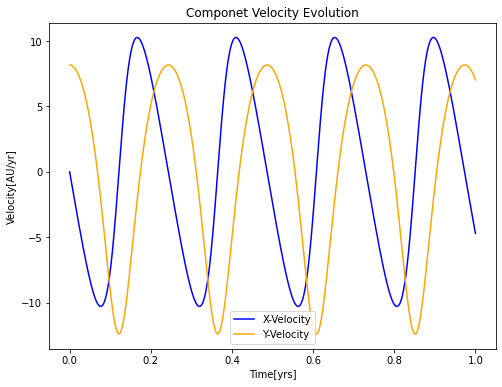

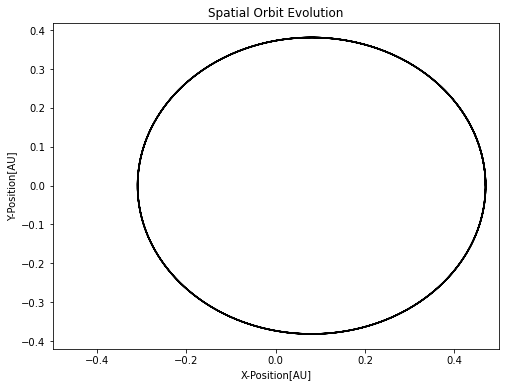

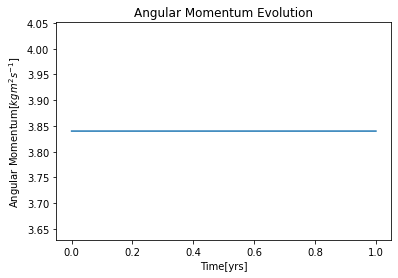

In [111]:
#plot a figure for velocity component evolution
plt.figure(figsize=[8,6])
plt.plot(t,vx,color='blue',label='X-Velocity')
plt.plot(t,vy,color='orange',label='Y-Velocity')
plt.xlabel('Time[yrs]')
plt.ylabel('Velocity[AU/yr]')
plt.title('Componet Velocity Evolution')
plt.legend()
plt.show()
plt.close()
#plot a figure for spatial evolution
plt.figure(figsize=[8,6])
plt.plot(x,y,color='black')
plt.xlabel('X-Position[AU]')
plt.ylabel('Y-Position[AU]')
plt.title('Spatial Orbit Evolution')
plt.xlim([-0.5,0.5])
plt.show()
plt.close()
#plot a figure that shows angular momentum evolution
plt.plot(t,L)
plt.xlabel('Time[yrs]')
plt.ylabel('Angular Momentum[$kg m^{2} s^{-1}$]')
plt.title('Angular Momentum Evolution')
plt.show()
plt.close()

### (d)

In [112]:
#specify initial conditions as the first entry in the lists that will hold all orbital information
x_gr=np.zeros(len(t))
y_gr=np.zeros(len(t))
vx_gr=np.zeros(len(t))
vy_gr=np.zeros(len(t))
x_gr[0]=0.47
y_gr[0]=0
vx_gr[0]=0
vy_gr[0]=8.17
Ms=1
G=39.5
#specify timestep(dt) and total time(T)
dt=0.0001
T=1
#specify the constant alpha (a)
a=0.01
#determine the number of steps that an integration time of dt will require to reach a total time T
ns=int(T/dt) + 1 #+1 to include the zero timestep
#specify the time domain
t=np.linspace(0,T,ns)
#loop the number of timesteps dt needed to reach total time T. INCLUDE a factor of (1+a/r) to accound for GR
for i in range(ns-1):
    vx_gr[i+1]=(vx_gr[i]-((G*Ms*x_gr[i]*dt)*(1+(a/(np.sqrt((x_gr[i]**2 + y_gr[i]**2)))**2))/(np.sqrt(x_gr[i]**2 + y_gr[i]**2))**3))
    #print((a/((x[i]**2 + y[i]**2))**2))
    vy_gr[i+1]=(vy_gr[i]-((G*Ms*y_gr[i]*dt)*(1+(a/(np.sqrt(x_gr[i]**2 + y_gr[i]**2))**2))/(np.sqrt(x_gr[i]**2 + y_gr[i]**2))**3))
    x_gr[i+1]=(x_gr[i]+vx_gr[i+1]*dt)
    y_gr[i+1]=(y_gr[i]+vy_gr[i+1]*dt)

In [113]:
#check angular momentum again in the same way
r_gr=[]
v_gr=[]
for i in range(len(x_gr)):
    r_gr.append([x_gr[i],y_gr[i]])
    v_gr.append([vx_gr[i],vy_gr[i]])
L_gr=[]
for i in range(len(r_gr)):
    L_gr.append(np.cross(r_gr[i],v_gr[i]))
for i in range(len(L_gr)):
    L_gr[i]=np.around(L_gr[i],2)

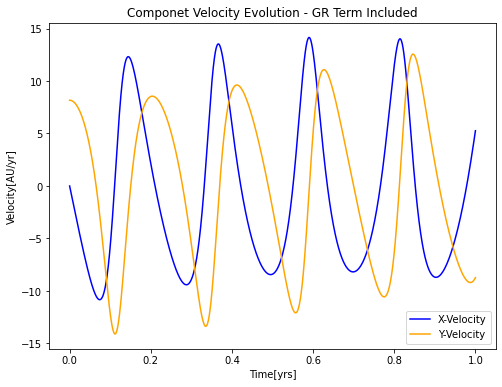

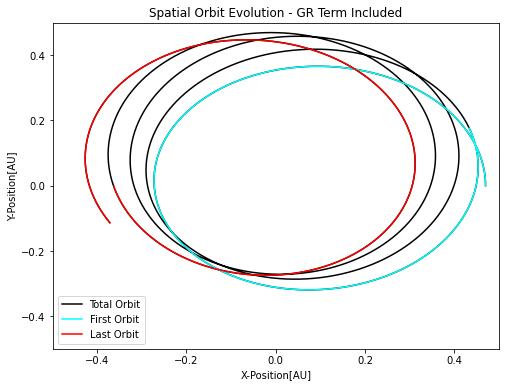

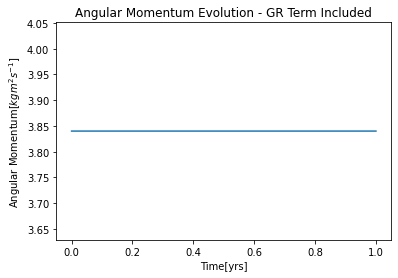

In [114]:
#plot a figure for velocity component evolution
plt.figure(figsize=[8,6])
plt.plot(t,vx_gr,color='blue',label='X-Velocity')
plt.plot(t,vy_gr,color='orange',label='Y-Velocity')
plt.xlabel('Time[yrs]')
plt.ylabel('Velocity[AU/yr]')
plt.title('Componet Velocity Evolution - GR Term Included')
plt.legend()
plt.show()
plt.close()
#plot a figure for spatial evolution
plt.figure(figsize=[8,6])
plt.plot(x_gr,y_gr,color='black',label='Total Orbit')
plt.plot(x_gr[:2250],y_gr[:2250],color='cyan',label='First Orbit')
plt.plot(x_gr[len(x_gr)-2250:],y_gr[len(y_gr)-2250:],color='red',label='Last Orbit')
plt.xlabel('X-Position[AU]')
plt.ylabel('Y-Position[AU]')
plt.title('Spatial Orbit Evolution - GR Term Included')
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])
plt.legend()
plt.show()
plt.close()
#plot a figure that shows angular momentum evolution
plt.plot(t,L_gr)
plt.xlabel('Time[yrs]')
plt.ylabel('Angular Momentum[$kg m^{2} s^{-1}$]')
plt.title('Angular Momentum Evolution - GR Term Included')
plt.show()
plt.close()

In [145]:
#the precession of Mercury's orbit can be shown easily between the first and last orbit plotted. 
#in the first orbit, the perihelion (approximated visually) is at (+0.4AU,0AU) this is shown in Cyan.
#in the last plotted orbit, the perihelion (approximated visually) is at just (-0.4AU,0.1AU) this is shown in Red. 
#thus, the furthest point of the orbit from (0,0) clearly changes with time.
#additionally, angular momentum is still conservered with the addition of GR.

## Q3

In [120]:
#choose values of n for the first computation
ns=[2,4,6,8,10,15,20,25,30,45,50,60,70,80,90,100,150,200,250,300,400,500,700,900,1100,1300,1400,1500]
#create lists that will hold time information
times_mm=[]
times_nd=[]
times_mc=[]
#loop through all chosen values of n
for i in ns:
    start1=time() #set a start time for the matrix creation (unneeded)
    A = np.ones([i,i],float)*7
    B = np.ones([i,i],float)*4 #set up matricies
    matrix_creation=time()-start1
    start2=time()
    C = A*B
    matrix_multiplication=time()-start2
    times_mc.append(matrix_creation)
    times_mm.append(matrix_multiplication)
    start3=time()
    D = np.dot(A,B)
    matrix_dot=time()-start3
    times_nd.append(matrix_dot)

In [117]:
#the same process but for n^3
ns3=[2**3,4**3,6**3,8**3,10**3,15**3,20**3,25**3,30**3]
times_mm3=[]
times_nd3=[]
times_mc3=[]
for i in ns3:
    start4=time()
    A3 = np.ones([i,i],float)*7
    B3 = np.ones([i,i],float)*4
    matrix_creation3=time()-start4
    start5=time()
    C3 = A3*B3
    matrix_multiplication3=time()-start5
    times_mc3.append(matrix_creation3)
    times_mm3.append(matrix_multiplication3)
    start6=time()
    D3 = np.dot(A3,B3)
    matrix_dot3=time()-start6
    times_nd3.append(matrix_dot3)

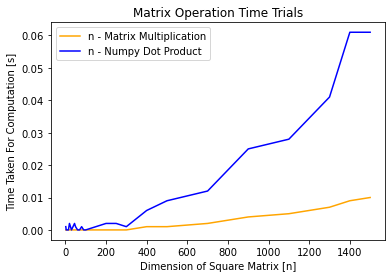

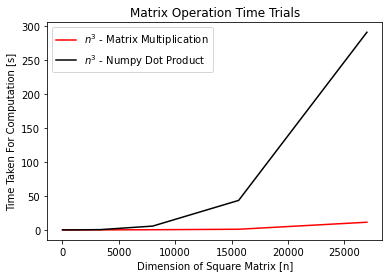

In [139]:
plt.plot(ns,times_mm,color='orange',label='n - Matrix Multiplication')
plt.plot(ns,times_nd,color='blue',label='n - Numpy Dot Product')
plt.xlabel('Dimension of Square Matrix [n]')
plt.ylabel('Time Taken For Computation [s]')
plt.title('Matrix Operation Time Trials')
plt.legend()
plt.show()
plt.close()
plt.plot(ns3,times_mm3,color='red',label='$n^{3}$ - Matrix Multiplication')
plt.plot(ns3,times_nd3,color='black',label='$n^{3}$ - Numpy Dot Product')
plt.xlabel('Dimension of Square Matrix [n]')
plt.ylabel('Time Taken For Computation [s]')
plt.title('Matrix Operation Time Trials')
plt.legend()

Clearly numpy array multiplication is faster than the equivalent matrix multiplication using numpy dot. Although the increased speed of computation is practically negligible for square matricies with 3000 columns or less (approximately half a second), the increased speed of compuatation is great for matricies with 3000 columns or more. At the extreme, multiplying two square matricies with 27000 columns is 25 times faster using numpy arrays than it is with numpy dot, a difference of 279 seconds, or 4 and a half minutes; numpy array calculations take approximately 11 seconds, whereas numpy dot calculations take almost 5 minutes.